<h2>House Price Prediction</h2>

In [135]:
import pandas as pd

In [136]:
housing=pd.read_csv("data.csv")

In [137]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [138]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       502 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [139]:
housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [140]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,502.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283982,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.699734,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887250,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [141]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

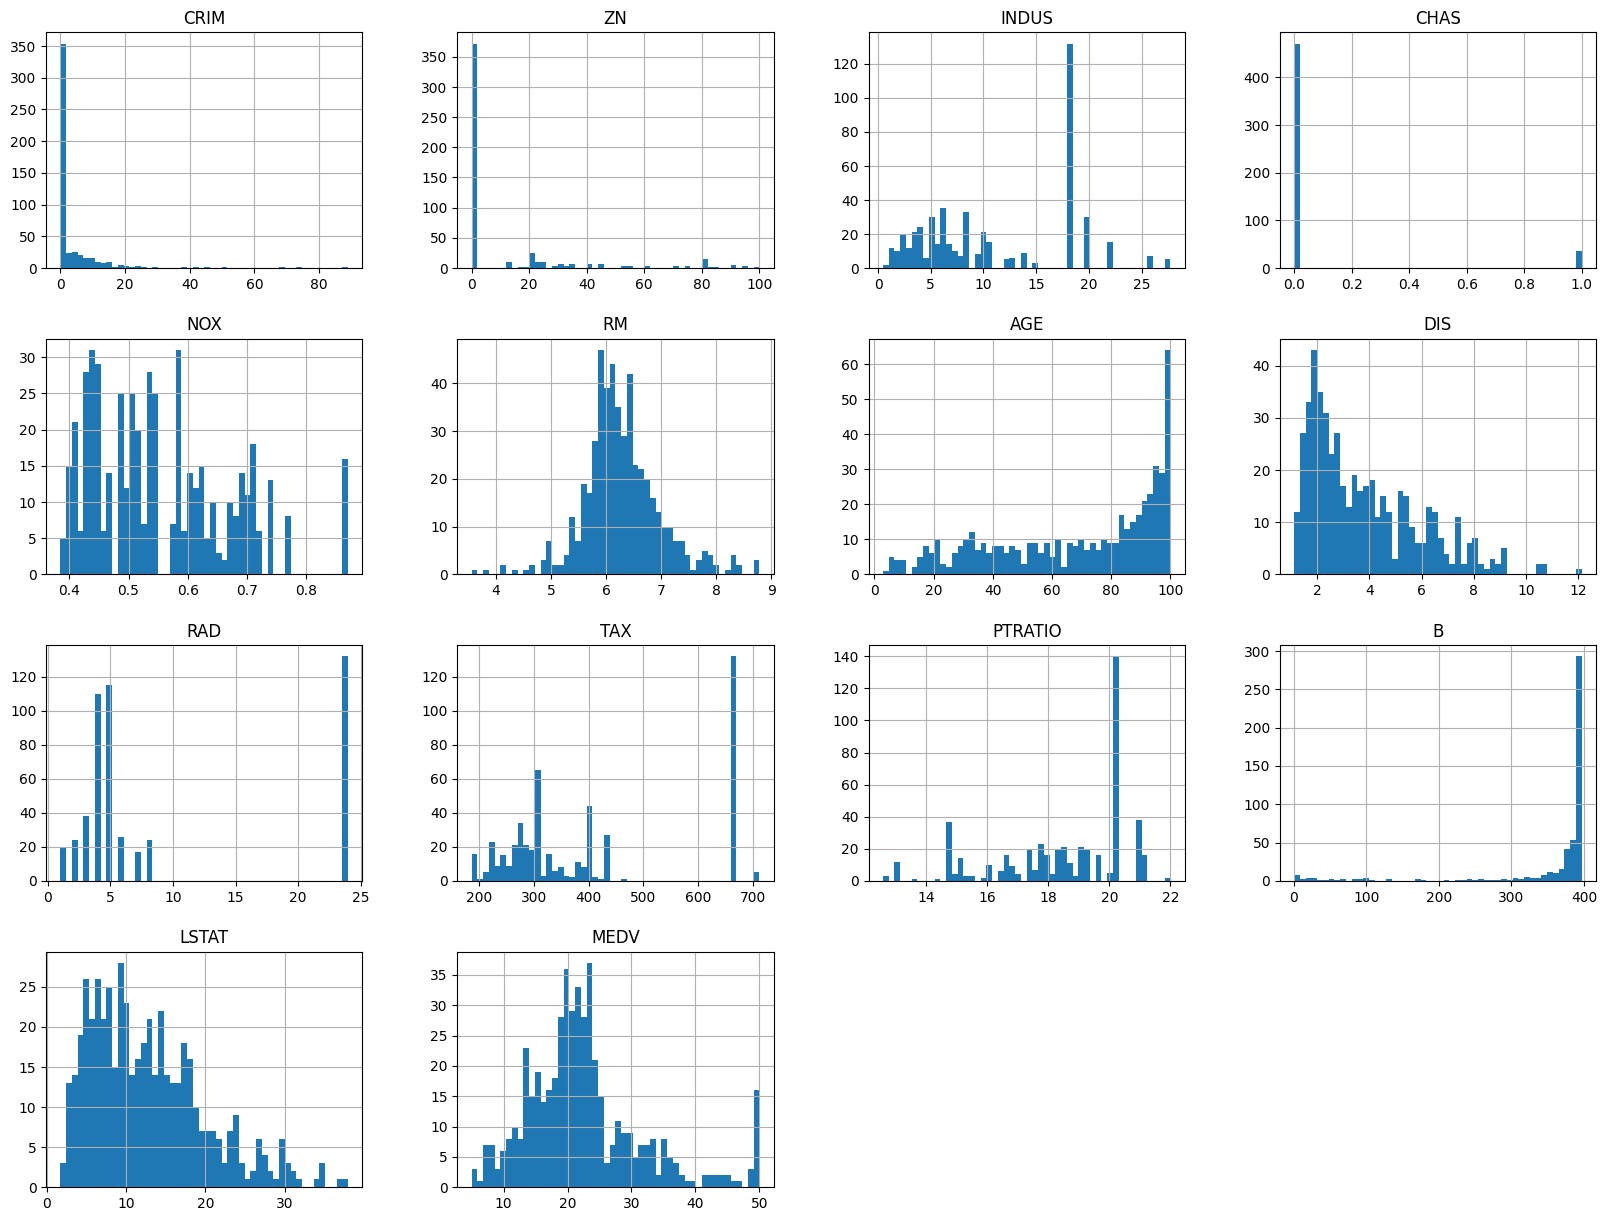

In [142]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))

<h2>Train-Test Splitting</h2>

In [143]:
# For learning purpose only
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)                                      # To fix the state of random numbers generated  (we can use any number in place of 42)
    shuffled=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [144]:
# train_set, test_set=split_train_test(housing, 0.2)

In [145]:
# print("Rows in training data: ", len(train_set), "\nRows in testing data: ", len(test_set))

In [146]:
from sklearn.model_selection import train_test_split
train_set, test_set=train_test_split(housing, test_size=0.2, random_state=42)
print("Rows in training data: ", len(train_set), "\nRows in testing data: ", len(test_set))

Rows in training data:  404 
Rows in testing data:  102


In [147]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [148]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [149]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

NOTE: Here, the ratio 95/7 is equal to 376/28, i.e., 95/7=376/28. This is achieved due to stratified shuffling. It helps in ensuring equal distribution of data in training and test set for that particular paramater (here, for 'CHAS')

In [150]:
# Copying the training set to the housing dataframe
housing=strat_train_set.copy()   

<h2>Looking for Correlations</h2>

In [151]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)       # 'MEDV' is the label

MEDV       1.000000
RM         0.676005
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

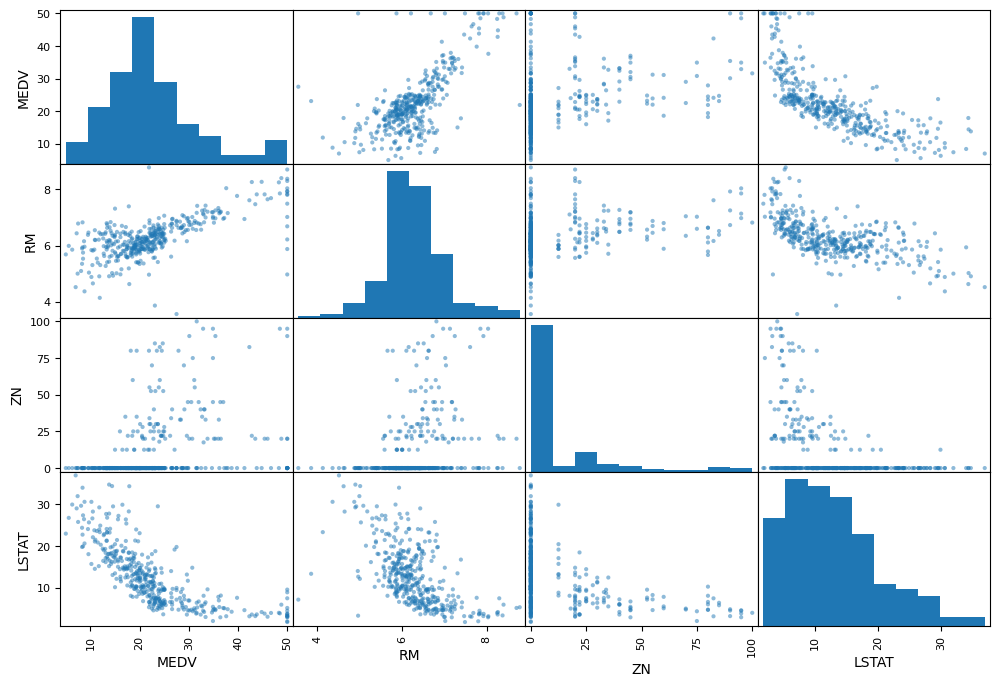

In [152]:
from pandas.plotting import scatter_matrix
attributes=["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='RM', ylabel='MEDV'>

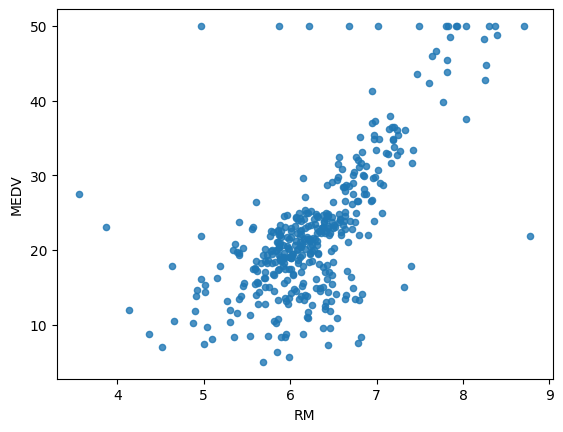

In [153]:
housing.plot(kind="scatter", x="RM", y="MEDV", alpha=0.8)

<h2>Trying out Attribute Combinations</h2>

In [154]:
housing["TAXRM"]=housing["TAX"]/housing["RM"]

<Axes: xlabel='TAXRM', ylabel='MEDV'>

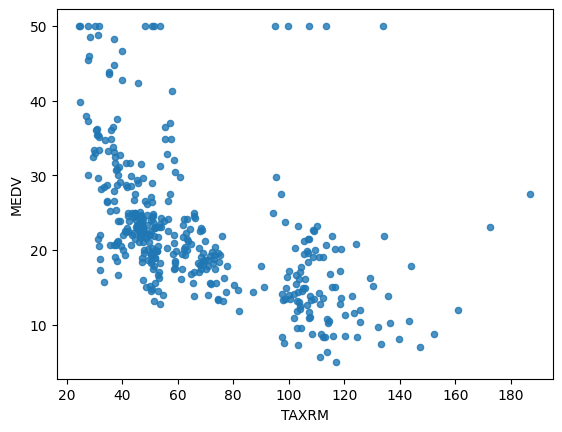

In [155]:
housing.plot(kind="scatter", x="TAXRM", y="MEDV", alpha=0.8)

In [156]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.676005
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526313
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [171]:
# In the final model, we are not considering the newly created attribute "TAXRM", it was only for our own understanding
housing=strat_train_set.drop("MEDV", axis=1)
housing_labels=strat_train_set["MEDV"].copy()

<h2>Missing Attributes</h2>

To take care of missing attributes, we have three options:
1. Get rid of the missing datapoints
2. Get rid of the whole attribute
3. Set the missing values to some other value (0, mean or median)

In [158]:
a=housing.dropna(subset="RM")            # Option1
a.shape
# Note that the missing data points have been dropped, but this will NOT effect the original dataset (as we have not used inplace)

(400, 13)

In [159]:
housing.drop("RM", axis=1).shape         # Option2
# Note that the whole "RM" attribute has been dropped, but this will NOT effect the original dataset (as we have not used inplace)

(404, 12)

In [160]:
median=housing["RM"].median()           # Computing median
housing["RM"].fillna(median)            # Option3
# Missing values are replaced by the median, but this will NOT effect the original dataset (as we have not used inplace)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [161]:
housing.shape

(404, 13)

In [162]:
housing.describe()                # Before we started filling the missing attributes

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279042,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.709512,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [163]:
# SimpleImputer is used to fill all the missing values in the training and the testing set with the median values of the respective columns
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [164]:
# Gives the median (strategy here) of all the columns
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [165]:
#Impute all the missing values in housing
X=imputer.transform(housing)

In [166]:
housing_transformed=pd.DataFrame(X, columns=housing.columns)

In [167]:
housing_transformed.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278394,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.706012,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


<h2>Scikit-learn Design</h2>

Scikit-learn primarily provides three types of objects:
1. Estimators - It estimates some parameter based on the dataset. Example, Imputer. It has a fit() method and a transform() method. Fit method fits the dataset and evaluates internal parameters.
   
2. Transformers - transform() method takes input and returns output based on the learnings from the fit() method. It also has a convinience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of a predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

<h2>Feature Scaling</h2>

Feature Scaling means to scale the attributes in such a manner that their values lie in similar ranges.
Primarily, there are two types of feature scaling methods:
1. Normalisation (Min-Max Scaling) - (value - min)/(max - min)
   Scikit-learn provides a class called MinMaxScaler for this.

2. Standardization - (value - mean)/std      [std - > Standard Deviation]
   Scikit-learn provides a class called StandardScaler for this.

NOTE: Standardization is better than Normalization because loss of data (which might be min/max of that particular column) will effect Normalization but not Standardization.

<h2>Creating a Pipeline</h2>

In [168]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    # ... add as many as you want
    ("std_scaler", StandardScaler())
])

In [169]:
housing_num_tr=my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

<h2>Selecting a desired model for House Price Prediction</h2>

In [225]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [226]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
prepared_data=my_pipeline.transform(some_data)

In [227]:
model.predict(prepared_data)                # gives list of predicted labels

array([22.473, 25.118, 16.452, 23.245, 23.522])

In [228]:
list(some_labels)                          # gives list of actual labels

[21.9, 24.5, 16.7, 23.1, 23.0]

<h2>Evaluating the model</h2>

In [229]:
from sklearn.metrics import mean_squared_error
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels, housing_predictions)
rmse=np.sqrt(mse)
# For LinearRegression, rmse=4.84; For DecisionTreeRegressor, rmse=0.0

In [230]:
rmse

1.2479771612691895

<h2>Using better evaluation technique - Cross Validation</h2>

In [231]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores=np.sqrt(-scores)

In [232]:
rmse_scores

array([2.92765533, 2.94649584, 4.5670023 , 2.53977564, 3.20757203,
       3.01375294, 4.95784047, 3.26520238, 3.09716874, 3.69837844])

In [233]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [234]:
print_scores(rmse_scores)

Scores:  [2.92765533 2.94649584 4.5670023  2.53977564 3.20757203 3.01375294
 4.95784047 3.26520238 3.09716874 3.69837844]
Mean:  3.4220844087674167
Standard Deviation:  0.73060028393145


<h2>Saving the model</h2>

In [235]:
from joblib import dump, load
dump(model, 'house.joblib') 

['house.joblib']

<h2>Testing the model on Test Data</h2>

In [236]:
X_test=strat_test_set.drop("MEDV", axis=1)
Y_test=strat_test_set["MEDV"].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test, final_predictions)
final_rmse=np.sqrt(final_mse)

In [237]:
final_rmse

2.9709615809845604

<h2>Using the Model</h2>

In [241]:
from joblib import dump, load
import numpy as np
features=np.array([[2.86735e-01, 0.00000e+00, 11.90000e+00, 0.00000e+00, 9.38000e-01, -6.21350e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02, 
                   1.90000e+01, 3.90955e+02, 1.15700e+01]])
model.predict(features)

array([12.205])